# Uvod #

U vodiču smo vidjeli kako izgraditi duboke neuronske mreže slaganjem slojeva unutar `Sekvencijalnog` modela. Dodavanjem *aktivacijske funkcije* nakon skrivenih slojeva, mreži smo dali mogućnost da nauči složenije (nelinearne) odnose u podacima.

U ovim ćete vježbama izgraditi neuronsku mrežu s nekoliko skrivenih slojeva i zatim istražiti neke aktivacijske funkcije izvan ReLU-a. Pokrenite ovu sljedeću ćeliju da sve postavite!

In [1]:
import tensorflow as tf

# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)


U skupu podataka *Concrete* vaš je zadatak predvidjeti tlačnu čvrstoću betona proizvedenog prema različitim recepturama.

Pokrenite sljedeću ćeliju koda bez promjena za učitavanje skupa podataka.

In [2]:
import pandas as pd

concrete = pd.read_csv('./input/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# 1) Ulazni oblik #

Cilj za ovaj zadatak je stupac `'CompressiveStrength'`. Preostali stupci su značajke koje ćemo koristiti kao ulazne podatke.

Kakav bi bio ulazni oblik za ovaj skup podataka?

In [4]:
# YOUR CODE HERE
input_shape = [8]


# 2) Definirajte model sa skrivenim slojevima #

Sada izradite model s tri skrivena sloja, od kojih svaki ima 512 jedinica i ReLU aktivaciju. Svakako uključite izlazni sloj od jedne jedinice i bez aktivacije, a također i `input_shape` kao argument prvom sloju.

In [6]:
from tensorflow import keras # type: ignore
from tensorflow.keras import layers # type: ignore

# YOUR CODE HERE
model = keras.Sequential({
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'), 
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
})

c:\Users\A507\bonic_paula\Lab3_online\labs\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3) Aktivacijski slojevi #

Istražimo neke funkcije aktivacije.

Uobičajeni način pripajanja aktivacijske funkcije sloju `Dense` jest uključiti je kao dio definicije s argumentom `activation`. Ponekad ćete ipak htjeti staviti neki drugi sloj između sloja `Dense` i njegove aktivacijske funkcije. (Vidjet ćemo primjer ovoga kasnije.) U ovom slučaju, možemo definirati aktivaciju u vlastitom sloju `Aktivacija`, ovako:

```
layers.Dense(units=8),
layers.Activation('relu')
```

Ovo je potpuno ekvivalentno uobičajenom načinu: `layers.Dense(units=8, activation='relu')`.

Prepišite sljedeći model tako da svaka aktivacija bude u vlastitom sloju `Activation`.

In [7]:
### YOUR CODE HERE: rewrite this to use activation layers
model = keras.Sequential([
    layers.Dense(512, input_shape=input_shape),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dense(1),
])




c:\Users\A507\bonic_paula\Lab3_online\labs\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Izborno: Alternative za ReLU #

Postoji cijela obitelj varijanti aktivacije `'relu'` -- `'elu'`, `'selu'`, i `'swish'`, između ostalih -- koje sve možete koristiti u Kerasu. Ponekad će jedna aktivacija biti bolja od druge na određenom zadatku, pa biste mogli razmisliti o eksperimentiranju s aktivacijama dok razvijate model. ReLU aktivacija ima tendenciju da dobro funkcionira na većini problema, tako da je dobra za početak.

Pogledajmo grafikone nekih od njih. Promijenite aktivaciju iz `'relu'` u jednu od ostalih gore navedenih. Zatim pokrenite ćeliju da vidite grafikon. (Provjerite [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) za više ideja.)

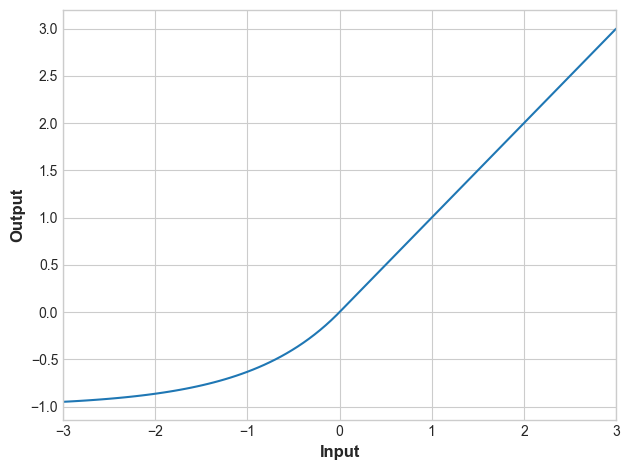

In [8]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# Dalje #

Sada prijeđite na sljedeću lekciju [**naučite kako istrenirati neuralnu mrežu**](Stochastic_Gradient_Descent_hr.ipynb) sa stohastičkim gradijentnim spuštanjem.